Determine which car to buy Hybrid, Electric, Gasoline, Diesel based on their MPG

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

In [2]:
df_electric_car = pd.read_csv('Data/Electric_Vehicle_Population_Data.csv')

Exploratory Data Analysis

In [3]:
df_electric_car.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df_electric_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

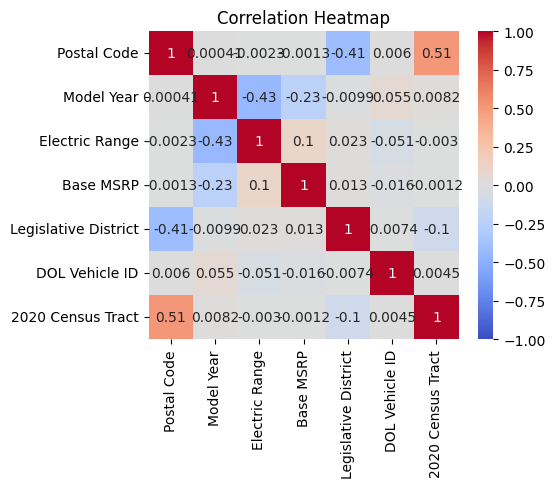

In [5]:
# Selecting numerical features only
df_numeric_electric = df_electric_car.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric_electric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Insight from the correlation matrix
    
    - Variable that has a strong correlations are Postal code and 2020 Census Tract but both of them not related to our project goal
    - Base MSRP has a strong positive correlations with Electric Range which means the range that the vehicle can achieve based on their Base MSRP number
    - Electric Range has a weak negative correlations with Model Year. This might be because there's no correlation between the car was make and the electric range

In [6]:
#drop column on data set electric car
df_electric = df_electric_car.drop(df_electric_car.columns[[0,1,2,3,4,9,12,13,14,16]], axis=1)

In [7]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Model Year             150482 non-null  int64 
 1   Make                   150482 non-null  object
 2   Model                  150482 non-null  object
 3   Electric Vehicle Type  150482 non-null  object
 4   Electric Range         150482 non-null  int64 
 5   Base MSRP              150482 non-null  int64 
 6   Electric Utility       150479 non-null  object
dtypes: int64(3), object(4)
memory usage: 8.0+ MB


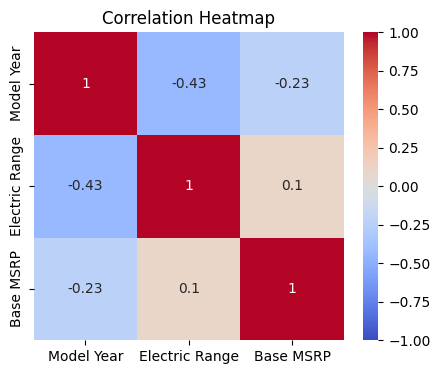

In [8]:
# Selecting numerical features only
df_numeric_electric = df_electric.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric_electric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
print("\nDescriptive Statistics of Categorical Variables")
df_electric.describe(include=['object', 'category'])


Descriptive Statistics of Categorical Variables


,Make,Model,Electric Vehicle Type,Electric Utility
count,150482,150482,150482,150479
unique,37,127,2,76
top,TESLA,MODEL Y,Battery Electric Vehicle (BEV),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,68983,28502,116807,55634


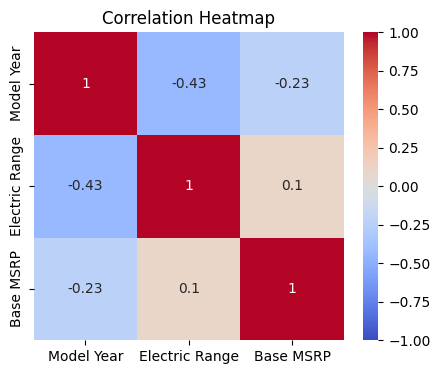

In [10]:
# Selecting numerical features only
df_numeric_electric = df_electric.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric_electric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

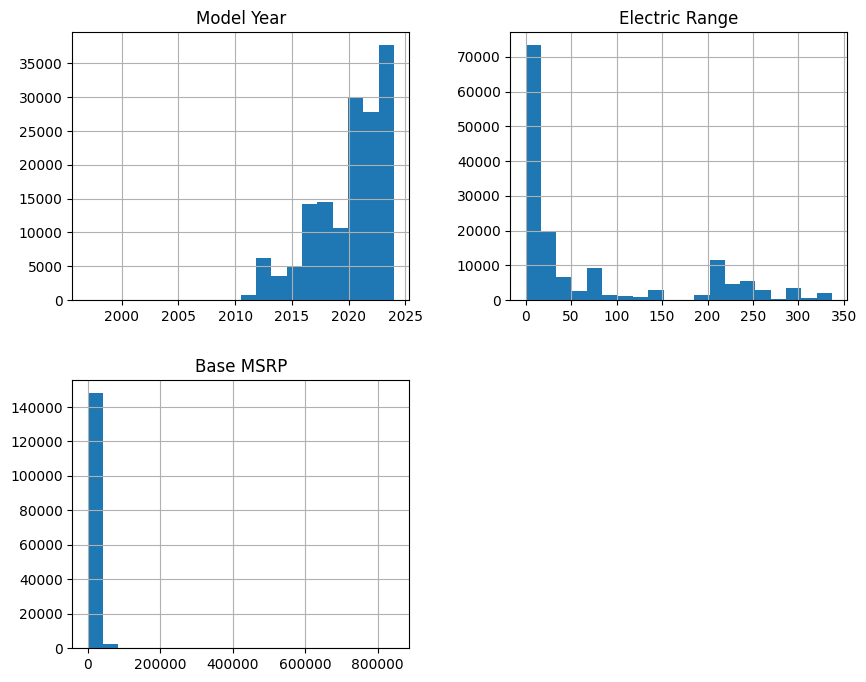

In [11]:
df_numeric_electric.hist(bins=20, figsize=(10, 8))
plt.show()

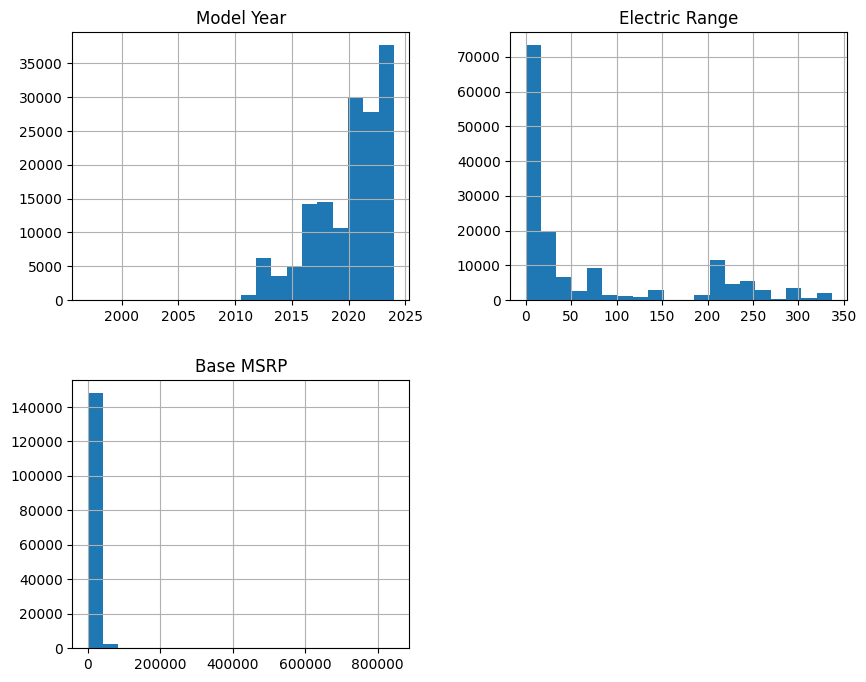

In [12]:
df_numeric_electric.hist(bins=20, figsize=(10, 8))
plt.show()

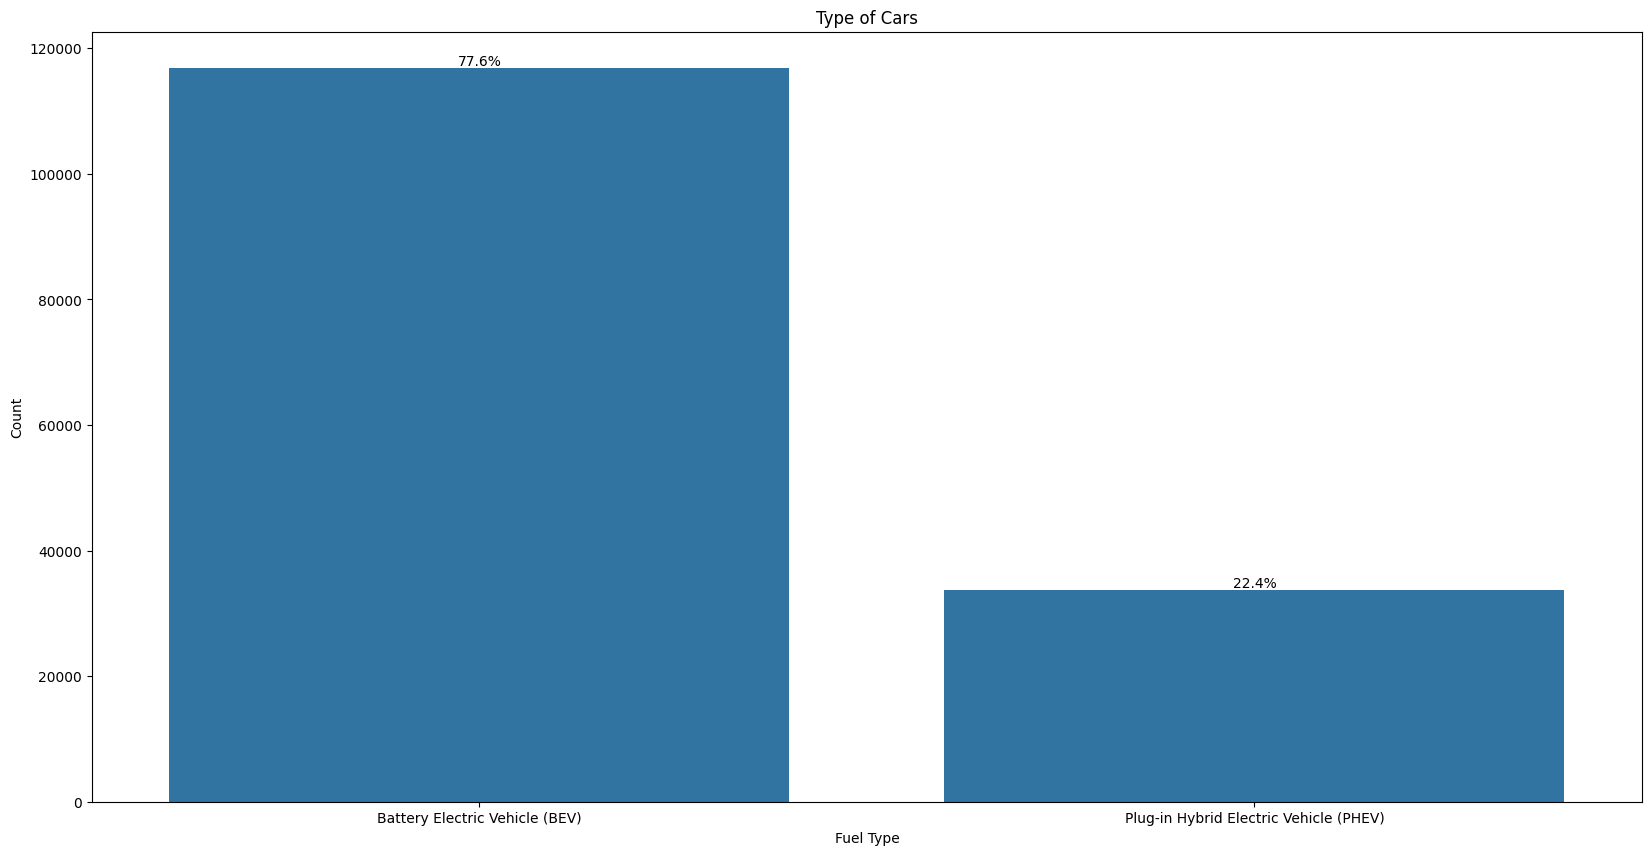

In [13]:
# Plot Survival with percentages on top of each bar
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Electric Vehicle Type', data=df_electric)

# Calculate percentages and annotate the bars
total = len(df_electric)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() /2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Type of Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

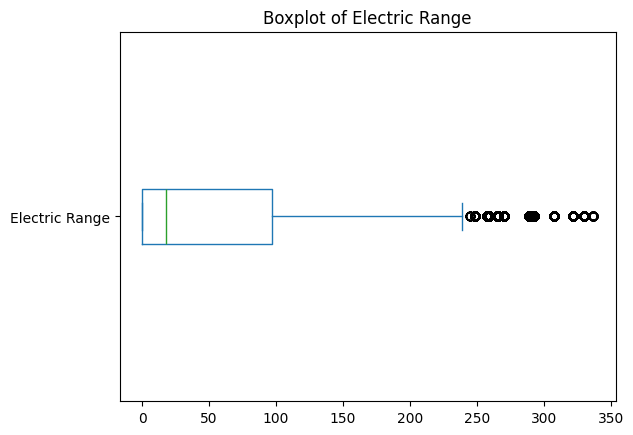

In [14]:
df_electric['Electric Range'].plot(kind = 'box', vert = False, title = "Boxplot of Electric Range");

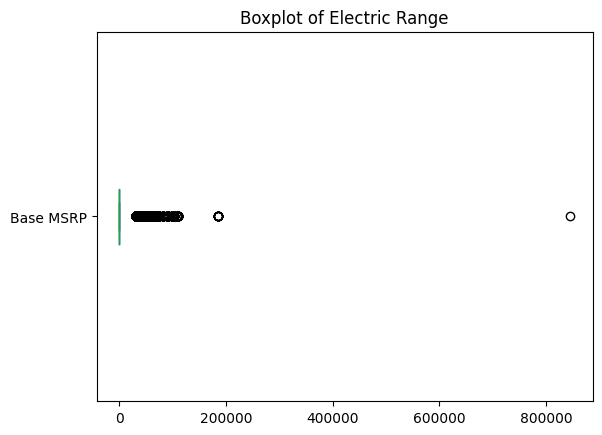

In [15]:
df_electric['Base MSRP'].plot(kind = 'box', vert = False, title = "Boxplot of Electric Range");

Outlier Treatment

In [16]:
Q1 = df_electric['Electric Range'].quantile(0.25)
Q3 = df_electric['Electric Range'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
df_electric['Electric Range'] = df_electric['Electric Range'].clip(lower=lower_bound, upper=upper_bound)

Bivariate Analysis

In [17]:
corr = df_electric.corr(numeric_only = True)


<Axes: >

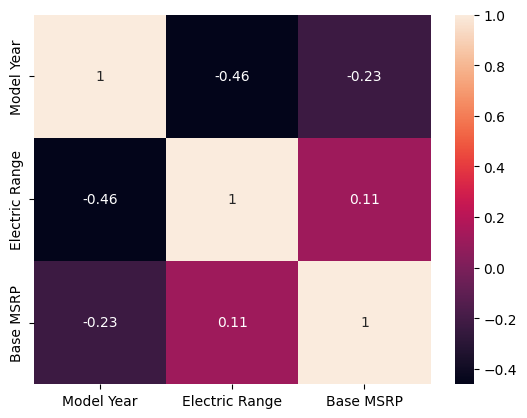

In [18]:
sns.heatmap(corr, annot = True)


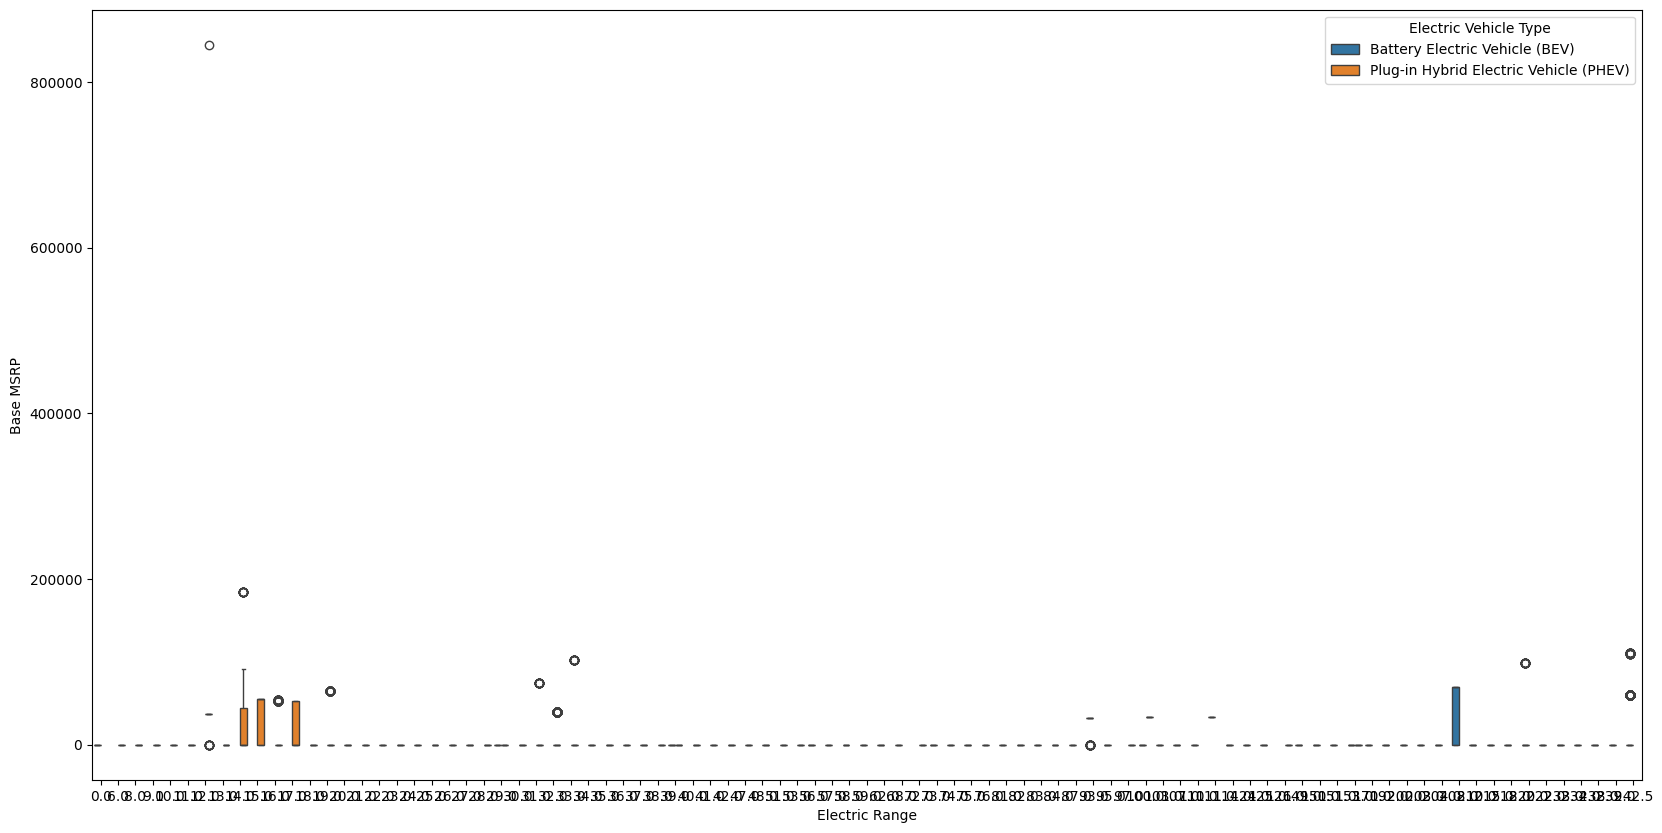

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'Electric Range', y = 'Base MSRP', data = df_electric, hue = "Electric Vehicle Type");


In [20]:
#normalized price data
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
df_electric['range_normalized'] = scaler.fit_transform(df_electric[['Electric Range']])

print(df_electric[['Electric Range', 'range_normalized']].head())

   Electric Range  range_normalized
0           242.5          1.978532
1            25.0         -0.445032
2            25.0         -0.445032
3           215.0          1.672105
4            97.0          0.357251


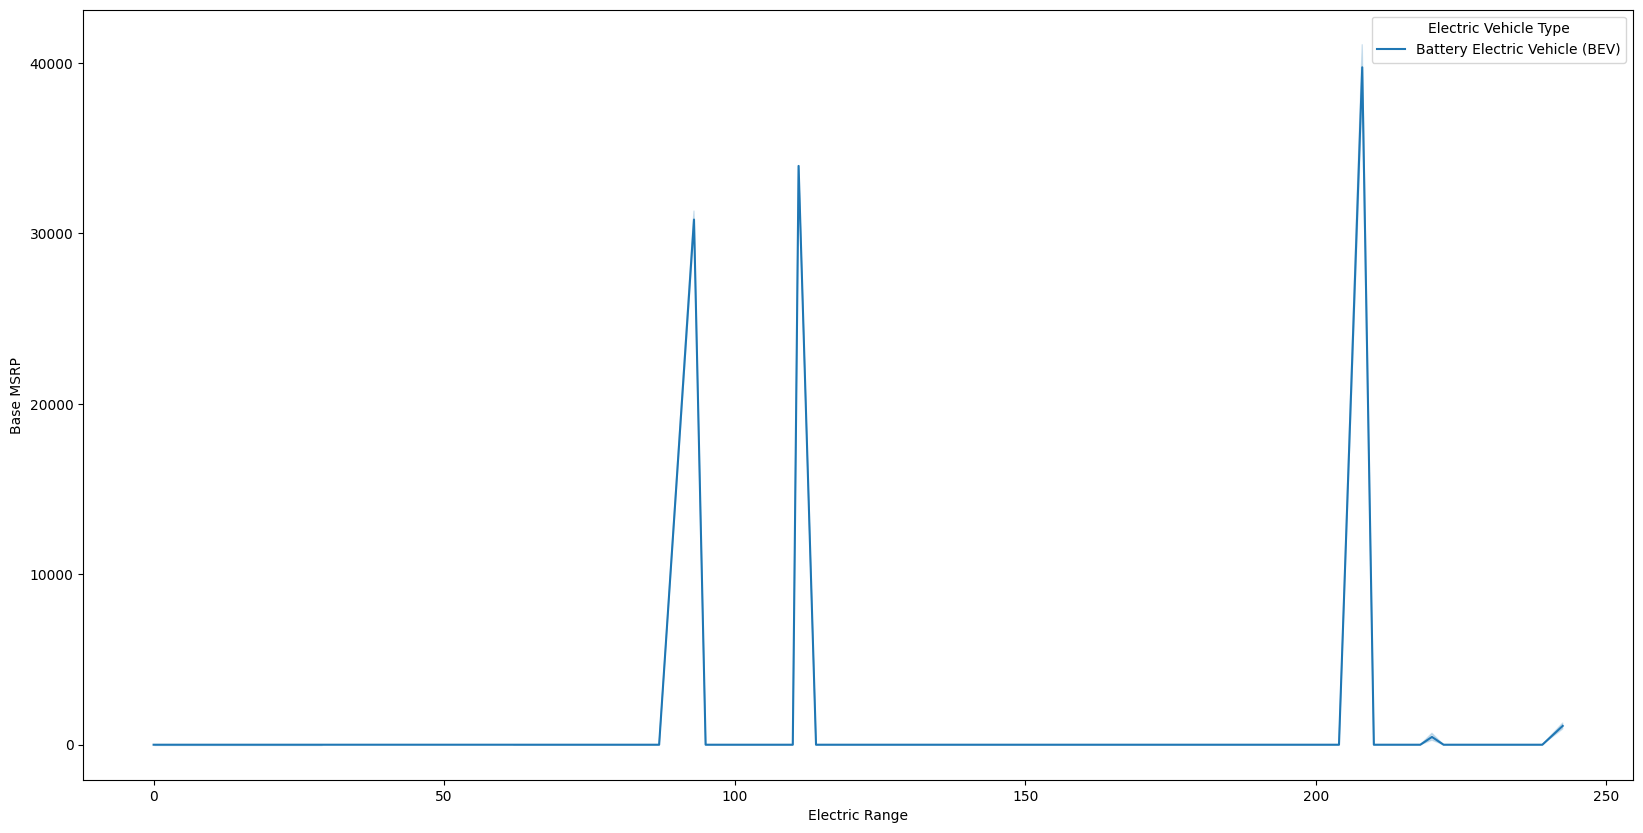

In [21]:
#Plot MPG with Fueltype = Petrol
plt.figure(figsize=(20, 10))
df_petrol = df_electric[df_electric['Electric Vehicle Type'] == "Battery Electric Vehicle (BEV)"]
sns.lineplot(x = 'Electric Range', y = 'Base MSRP', data = df_petrol, hue = "Electric Vehicle Type");

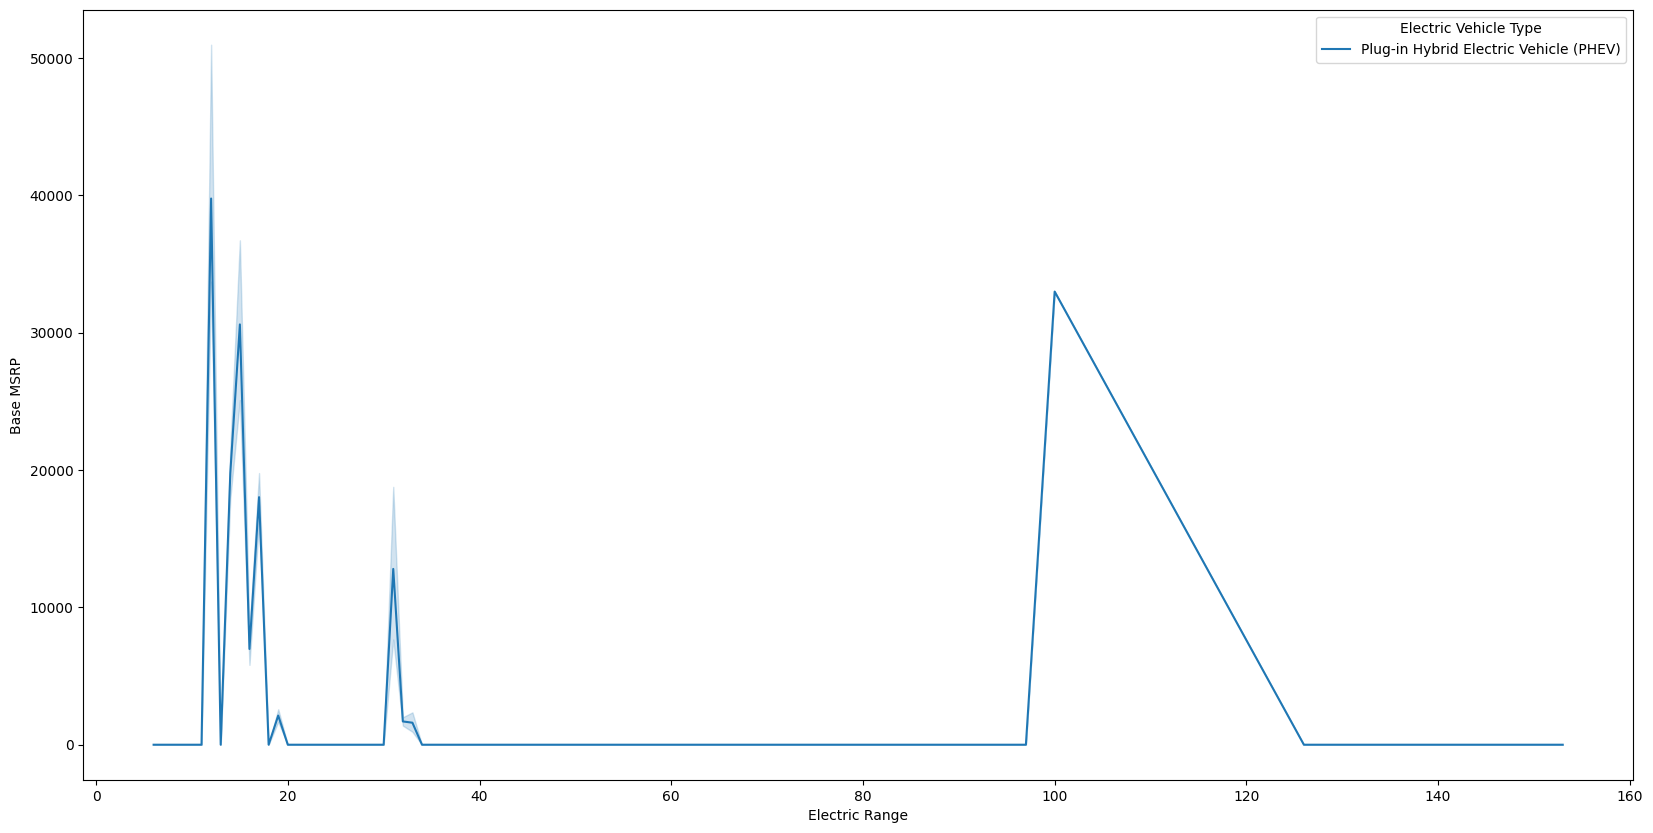

In [22]:
#Plot MPG with Fueltype = BEV
plt.figure(figsize=(20, 10))
df_BEV = df_electric[df_electric['Electric Vehicle Type'] == "Plug-in Hybrid Electric Vehicle (PHEV)"]
sns.lineplot(x = 'Electric Range', y = 'Base MSRP', data = df_BEV, hue = "Electric Vehicle Type");


Train / Split Data

In [23]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Model Year             150482 non-null  int64  
 1   Make                   150482 non-null  object 
 2   Model                  150482 non-null  object 
 3   Electric Vehicle Type  150482 non-null  object 
 4   Electric Range         150482 non-null  float64
 5   Base MSRP              150482 non-null  int64  
 6   Electric Utility       150479 non-null  object 
 7   range_normalized       150482 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.2+ MB


In [24]:
X = df_electric.drop(columns = {'Model Year','Model','Make','Electric Vehicle Type','Electric Utility','Electric Range'})
y = df_electric['Base MSRP']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [27]:
print(X_train.shape)
print(X_test.shape)

print("=" * 50)

print(y_train.shape)
print(y_test.shape)

(120385, 2)
(30097, 2)
(120385,)
(30097,)


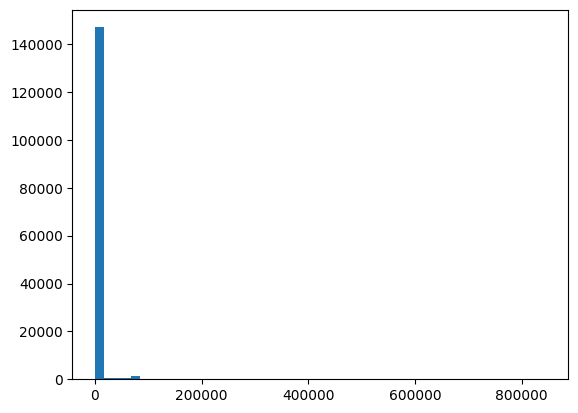

count    150482.000000
mean       1312.644735
std        9231.310215
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64


In [28]:
import matplotlib.pyplot as plt  

plt.hist(y, bins=50)  # Check distribution of target variable
plt.show()

print(y.describe())  # Get min, max, mean, etc.

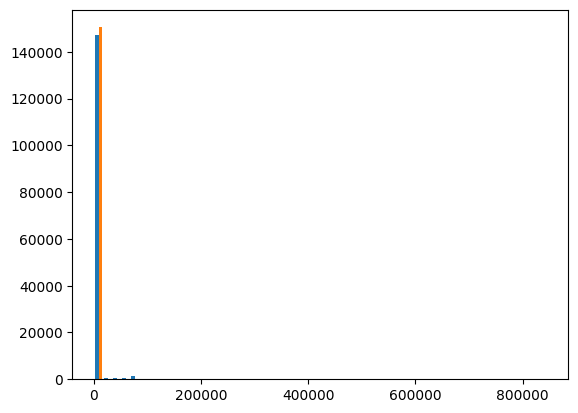

           Base MSRP  range_normalized
count  150482.000000      1.504820e+05
mean     1312.644735     -3.645213e-17
std      9231.310215      1.000003e+00
min         0.000000     -7.236026e-01
25%         0.000000     -7.236026e-01
50%         0.000000     -5.230317e-01
75%         0.000000      3.572513e-01
max    845000.000000      1.978532e+00


In [29]:
plt.hist(X, bins=50)  # Check distribution of target variable
plt.show()

print(X.describe())  # Get min, max, mean, etc.

In [30]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()

In [31]:
# fit the model
from sklearn.metrics import mean_squared_error


dummy.fit(X_train, y_train)

# R^2 of the model
dummy_r2 = dummy.score(X_train, y_train)
print("The value of dummy_r2 is {:.2f}".format(dummy_r2))

# Predictions on test 
dummy_predict = dummy.predict(X_test)

# rmse
dummy_rmse = mean_squared_error(y_test, dummy_predict)
print("The value of dummy rmse is {:.2f}".format(dummy_rmse))

The value of dummy_r2 is 0.00
The value of dummy rmse is 75201234.78


In [32]:
x = list(range(0, len(y_test)))

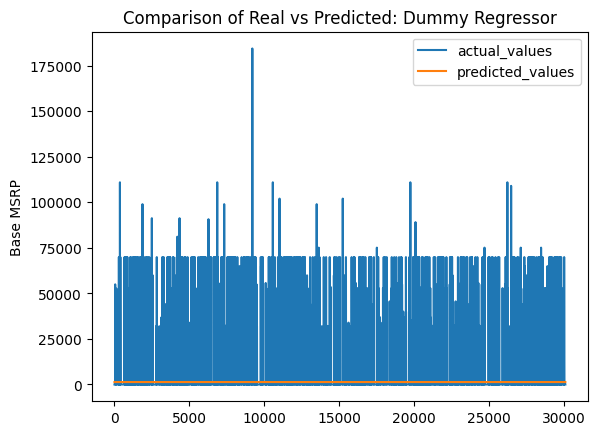

In [33]:
sns.lineplot(x = x, y = y_test, label = 'actual_values');
sns.lineplot(x = x, y = dummy_predict, label = 'predicted_values');

plt.title("Comparison of Real vs Predicted: Dummy Regressor");

Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr = Ridge(alpha=0.1)  # Adjust alpha as needed

In [35]:
# fit the model
lr.fit(X_train, y_train)

# R^2 of the model
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {:.2f}".format(lr_r2))

# Predictions on test 
lr_predict = lr.predict(X_test)

# rmse
lr_rmse = mean_squared_error(y_test, lr_predict)
print("The value of lr rmse is {:.2f}".format(lr_rmse))

The value of lr_r2 is 1.00
The value of lr rmse is 0.00


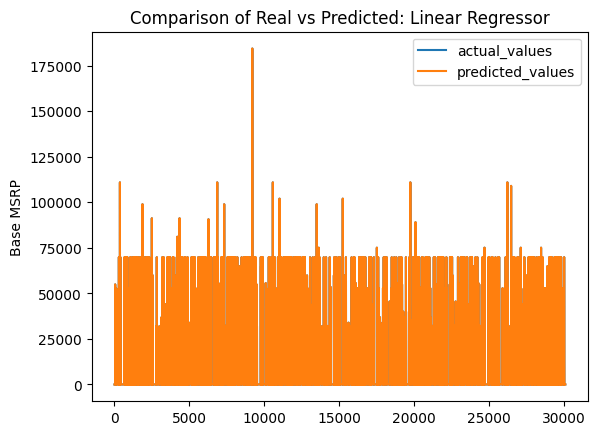

In [36]:
sns.lineplot(x = x, y = y_test, label = "actual_values");
sns.lineplot(x = x, y = lr_predict, label = "predicted_values");

plt.title("Comparison of Real vs Predicted: Linear Regressor");

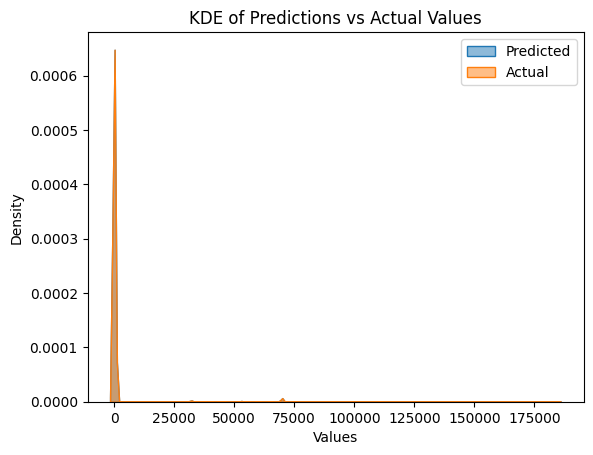

In [37]:
sns.kdeplot(lr_predict, label='Predicted', fill=True, alpha=0.5, bw_adjust=0.5);
sns.kdeplot(y_test, label='Actual', fill=True, alpha=0.5, bw_adjust=0.5);

plt.title("KDE of Predictions vs Actual Values");
plt.xlabel("Values");
plt.ylabel("Density");
plt.legend();
plt.show();

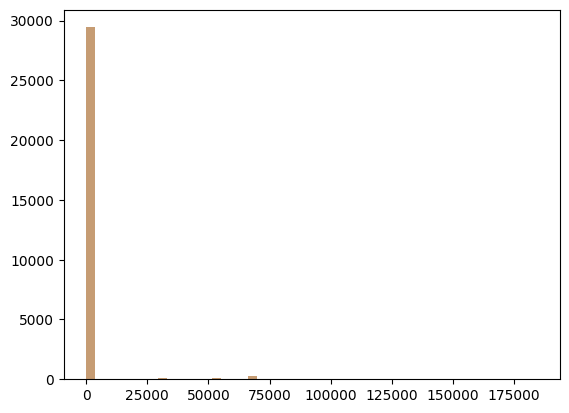

In [38]:
plt.hist(lr_predict, alpha = 0.5, bins= 50);
plt.hist(y_test, alpha = 0.5, bins = 50);

In [39]:
print("Intercept:", lr.intercept_)

Intercept: -1.1596057447604835e-11


In [40]:
print("Coefficients:", lr.coef_)


Coefficients: [ 1.0000000e+00 -5.5196497e-12]


Linear Regression on Categorical data

In [41]:
df_electric.select_dtypes("object").columns

Index(['Make', 'Model', 'Electric Vehicle Type', 'Electric Utility'], dtype='object')

In [42]:
df_electric.select_dtypes("object").agg(["nunique"])

,Make,Model,Electric Vehicle Type,Electric Utility
nunique,37,127,2,76


In [43]:
df_categorical = ['Base MSRP','Electric Vehicle Type']
df_categorical_data = pd.DataFrame(df_electric[df_categorical])
mpg = df_electric['Base MSRP']
print(df_categorical_data)

        Base MSRP                   Electric Vehicle Type
0               0          Battery Electric Vehicle (BEV)
1               0  Plug-in Hybrid Electric Vehicle (PHEV)
2               0  Plug-in Hybrid Electric Vehicle (PHEV)
3               0          Battery Electric Vehicle (BEV)
4               0  Plug-in Hybrid Electric Vehicle (PHEV)
...           ...                                     ...
150477          0          Battery Electric Vehicle (BEV)
150478          0          Battery Electric Vehicle (BEV)
150479          0          Battery Electric Vehicle (BEV)
150480          0  Plug-in Hybrid Electric Vehicle (PHEV)
150481          0          Battery Electric Vehicle (BEV)

[150482 rows x 2 columns]


In [44]:
dummies = pd.get_dummies(df_categorical_data['Electric Vehicle Type'])
print(dummies)

        Battery Electric Vehicle (BEV)  Plug-in Hybrid Electric Vehicle (PHEV)
0                                 True                                   False
1                                False                                    True
2                                False                                    True
3                                 True                                   False
4                                False                                    True
...                                ...                                     ...
150477                            True                                   False
150478                            True                                   False
150479                            True                                   False
150480                           False                                    True
150481                            True                                   False

[150482 rows x 2 columns]


In [45]:
data_dummies = pd.concat([df_categorical_data, dummies], axis = 1)
print(data_dummies)

        Base MSRP                   Electric Vehicle Type  \
0               0          Battery Electric Vehicle (BEV)   
1               0  Plug-in Hybrid Electric Vehicle (PHEV)   
2               0  Plug-in Hybrid Electric Vehicle (PHEV)   
3               0          Battery Electric Vehicle (BEV)   
4               0  Plug-in Hybrid Electric Vehicle (PHEV)   
...           ...                                     ...   
150477          0          Battery Electric Vehicle (BEV)   
150478          0          Battery Electric Vehicle (BEV)   
150479          0          Battery Electric Vehicle (BEV)   
150480          0  Plug-in Hybrid Electric Vehicle (PHEV)   
150481          0          Battery Electric Vehicle (BEV)   

        Battery Electric Vehicle (BEV)  Plug-in Hybrid Electric Vehicle (PHEV)  
0                                 True                                   False  
1                                False                                    True  
2                       

In [46]:
del data_dummies['Electric Vehicle Type']

In [47]:
from sklearn import linear_model

f_with_trans = linear_model.LinearRegression(fit_intercept = False)
f_with_trans.fit(data_dummies, mpg)

LinearRegression(fit_intercept=False)

In [48]:
f_with_trans.coef_


array([1.00000000e+00, 1.48578255e-14, 8.04022060e-15])

Evaluation

In [49]:
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

print(f"Training Error: {train_error}")
print(f"Testing Error: {test_error}")

Training Error: 6.432524178158306e-21
Testing Error: 5.494259022331086e-21


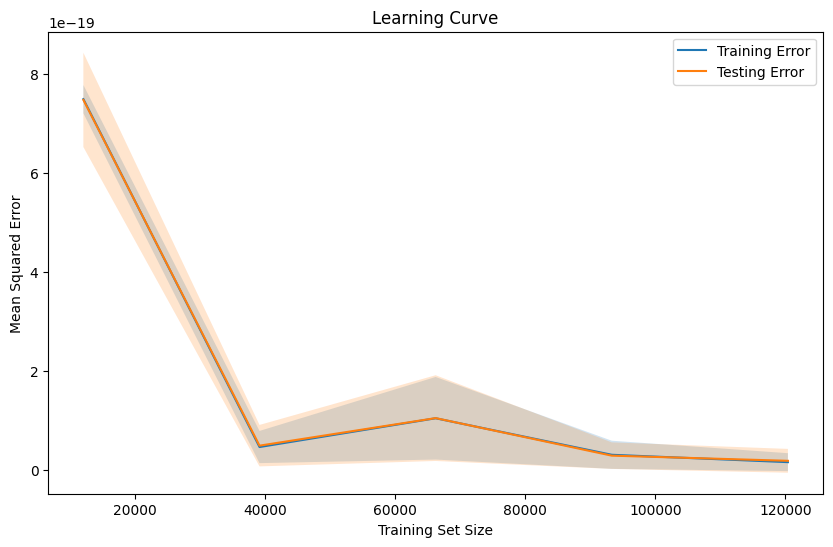

In [50]:
# Predict on training and test sets
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Print model evaluation
results = {
    "Training MSE": train_mse,
    "Testing MSE": test_mse,
    "Training R²": train_r2,
    "Testing R²": test_r2
}

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Error")
plt.plot(train_sizes, test_mean, label="Testing Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [51]:
r2_train = lr.score(X_train, y_train)  # R² on training data
r2_test = lr.score(X_test, y_test)  # R² on test data

print(f"Train R² Score: {r2_train}")
print(f"Test R² Score: {r2_test}")

Train R² Score: 1.0
Test R² Score: 1.0


Model Comparison

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Train models and store predictions
predictions = {}
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    predictions[name] = y_pred
    metrics[name] = {"MSE": mse, "R² Score": r2}

In [53]:
# Print model performance comparison
for name, metric in metrics.items():
    print(f"{name}:")
    print(f"   Mean Squared Error: {metric['MSE']:.4f}")
    print(f"   R² Score: {metric['R² Score']:.4f}\n")

Random Forest:
   Mean Squared Error: 30883.6855
   R² Score: 0.9996

Ridge Regression:
   Mean Squared Error: 0.0000
   R² Score: 1.0000

Decision Tree:
   Mean Squared Error: 105432.7747
   R² Score: 0.9986

Support Vector Machine:
   Mean Squared Error: 67674858.2065
   R² Score: 0.1000



Results

Conclusions
- Base MSRP has many missing values but has a big correlation with the electric range variable
- Model that has a minimum error is Ridge Regression which is suit for analyze this type of dataset


Future Work
- There's need to clean or adjust the Base MSRP variable so it will give the dataset more value and make a good result
- Need more variable becauase the numeric value just 3 variable (ex. charging time to full, battery capacity, and etc)